In [2]:
from utils import make_good_unitary, power, spatial_dot
import numpy as np
import nengo_spa as spa

import matplotlib.pyplot as plt

In [5]:
D = 512
X = make_good_unitary(D)
Y = make_good_unitary(D)

In [9]:
x_range = (3,4)
y_range = (1,4)

In [95]:
fft_X = np.fft.fft(X.v)
fft_Y = np.fft.fft(Y.v)

phi = np.angle(fft_X)
gamma = np.angle(fft_Y)
assert np.allclose(np.abs(fft_X), 1)
assert np.allclose(np.abs(fft_Y), 1)

#masks to seperate when angle is 0, then you're integrating a constant so it's simply b-a
phi_mask = phi != 0
gamma_mask = gamma != 0

x_integral = np.zeros_like(fft_X)
y_integral = np.zeros_like(fft_X)

x_integral[phi_mask] = np.fft.fft((power(X, x_range[1]) - power(X, x_range[0])).v)[phi_mask] * 1j / phi[phi_mask]
x_integral[np.logical_not(phi_mask)] = (x_range[1]-x_range[0])

y_integral[gamma_mask] = np.fft.fft((power(Y, y_range[1]) - power(Y, y_range[0])).v)[gamma_mask] * 1j / gamma[gamma_mask]
y_integral[np.logical_not(gamma_mask)] = (y_range[1]-y_range[0])

rectangle = spa.SemanticPointer(np.fft.ifft(x_integral * y_integral))

In [10]:
from region_query_utils import generate_rectangle_region
sp = spatial_dot(generate_rectangle_region(x_range,y_range,X,Y), np.linspace(-5,5, 100), np.linspace(-5,5, 100), X, Y)

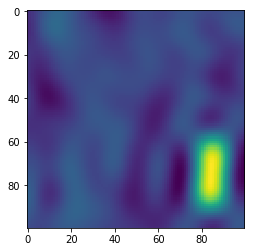

In [11]:
plt.imshow(sp)

dtype('complex128')

array([ 2.        +0.j        , -0.28913863+1.46831474j,
       -0.22588103+0.45284605j,  1.74547729-0.16052928j,
        0.71789736+1.6184772j ,  0.38015995+0.60542668j,
       -1.65211086+1.1251399j , -1.038965  -0.23257082j,
       -0.19298132+1.97700022j,  0.81551481-1.79658514j,
        1.30514003-1.16464699j, -1.95360829-0.41441586j,
       -1.80619379+0.25915326j, -1.77596713-0.69664838j,
        0.61211438-0.82553803j,  0.26625447-1.50865816j,
       -0.72456322-1.85464731j,  0.21329623-0.32872619j,
       -0.65261581-1.88925226j, -1.11285907+0.63760395j,
       -1.26562107+1.48859528j, -0.4588026 +0.97218142j,
       -0.32219169-0.38783004j,  0.25763254-1.03033907j,
       -1.74042471+0.62037617j, -1.87238207-0.66978393j,
       -0.73946409-1.14504711j, -1.89137   +0.62649986j,
       -0.41762963-1.48444476j,  0.27941666-0.05034371j,
       -1.72152507+0.75417585j,  1.65073992-0.05815605j,
        0.05787158-1.10806225j, -0.09714915+0.16466414j,
       -0.17670025+0.26499773j,